lets use $f(x) = sin(x)$ as our example function
Our domain shall be from $0$ to $\frac{\pi}{2}$

The goal is to understand how different integration techniques work
  - midpoint rule
  - trapezoid
  - simpson rule

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import simps

In [2]:
# Define the function to integrate and specify interval and subintervals
x = sp.Symbol('x')
f = sp.sin(x)
a = 0
b = math.pi/2
n = 100
# Calculate the width of each subinterval
h = (b - a) / n
integral_result = sp.integrate(f, (x, a, b))

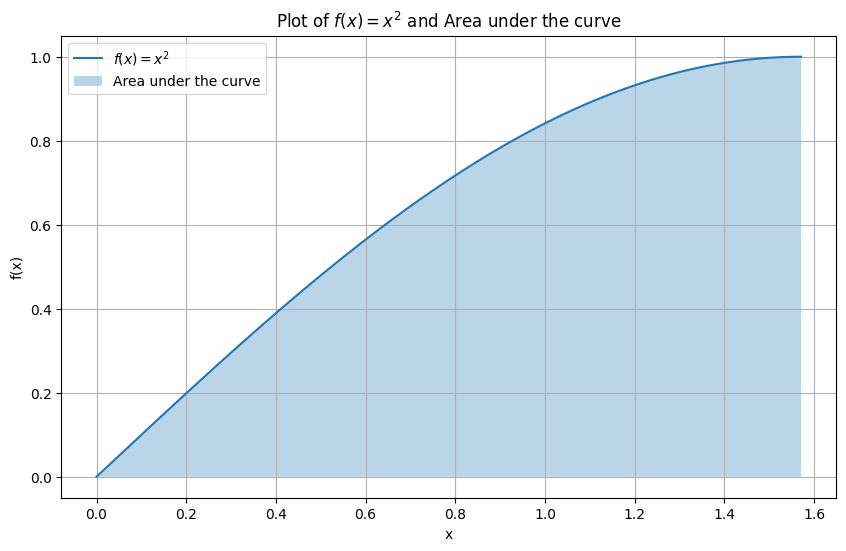

1.00000000000000

In [3]:
def exact_int(integral_result, resolution):
    # Create a numeric version of the function for plotting
    f_numeric = sp.lambdify(x, f, 'numpy')

    # Generate x values for plotting
    x_vals = np.linspace(0, b, resolution)
    y_vals = f_numeric(x_vals)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='$f(x) = x^2$')

    # Shade the area under the curve for the integral
    x_fill = np.linspace(0, b, 400)
    y_fill = f_numeric(x_fill)
    plt.fill_between(x_fill, y_fill, alpha=0.3, label='Area under the curve')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of $f(x) = x^2$ and Area under the curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    return integral_result

exact_int(integral_result, 4000)


So we see that the exact value for the area under the curve is 512/3. Note that changing the resolution only affects the ability to shade the area under the curve more precisely (soley visual). The value for the soltuion does not change.

Now lets model the midpoint rule <br>
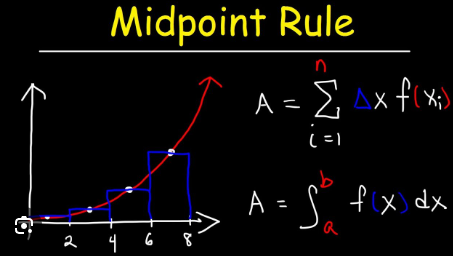

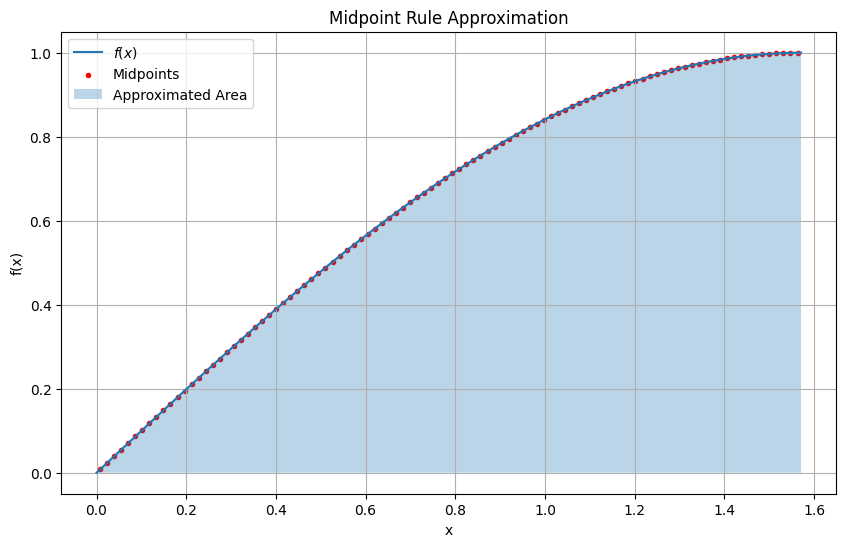

In [4]:
def midpoint_rule_integration(f, a, b, n, h,  plot=False):
    # Calculate the midpoints of each subinterval
    midpoints = [a + (i + 0.5) * h for i in range(n)]

    # Calculate the sum of function values at midpoints
    approximation = h * sum([f.subs(x, midpoint) for midpoint in midpoints])

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the midpoints
        plt.scatter(midpoints, [f_numeric(midpoint) for midpoint in midpoints], color='red', label='Midpoints', marker=".")

        # Shade the area under the curve for the approximation
        x_fill = np.linspace(a, b, 400)
        y_fill = f_numeric(x_fill)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label='Approximated Area')

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Midpoint Rule Approximation')
        plt.legend()
        plt.grid(True)
        plt.show()

    # print("Approximated integral using Midpoint Rule:", approximation)
    return approximation

# Call the function with and without plotting
approximation = midpoint_rule_integration(f, a, b, n, h, plot=True)


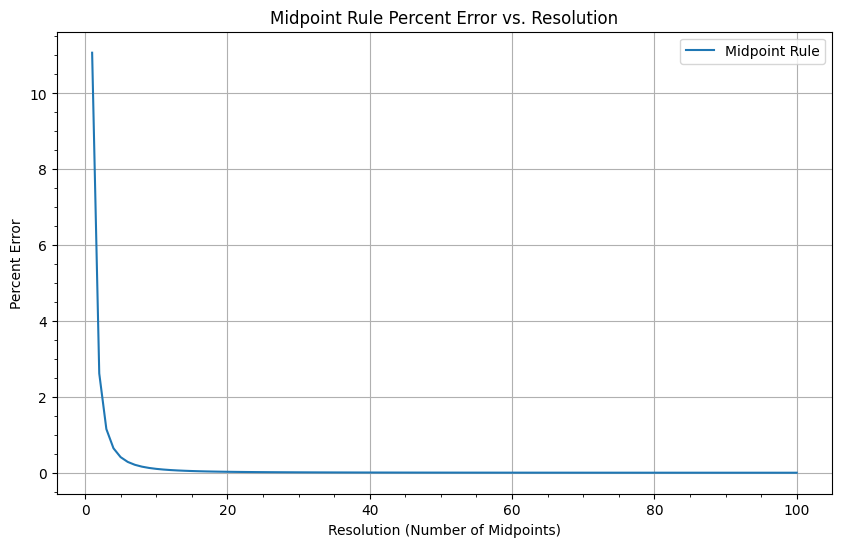

In [5]:
def graph_midpoint_error():
    percent_errors = []
    resolutions = range(1, 101)
    for resolution in resolutions:
        # Calculate 'h' for each resolution
        h = (b - a) / resolution

        # Call the function with the calculated 'h'
        approximation = midpoint_rule_integration(f, a, b, resolution, h, plot=False)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors, label='Midpoint Rule')
    plt.xlabel('Resolution (Number of Midpoints)')
    plt.ylabel('Percent Error')
    plt.title('Midpoint Rule Percent Error vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to graph the errors
graph_midpoint_error()

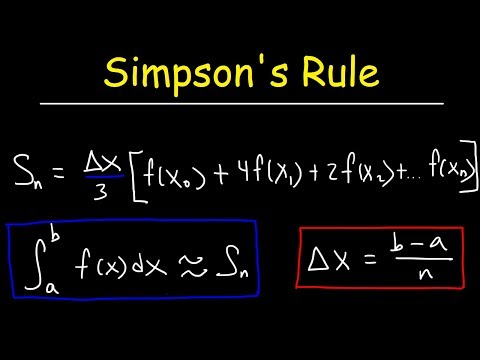

The Simpson's rule for integration is given by:

$$
\int_{{x_{2i}}}^{{x_{2i+2}}} f(x) \, dx \approx \frac{h}{3} \left[ f(x_{2i}) + 4f(x_{2i+1}) + f(x_{2i+2}) \right]
$$


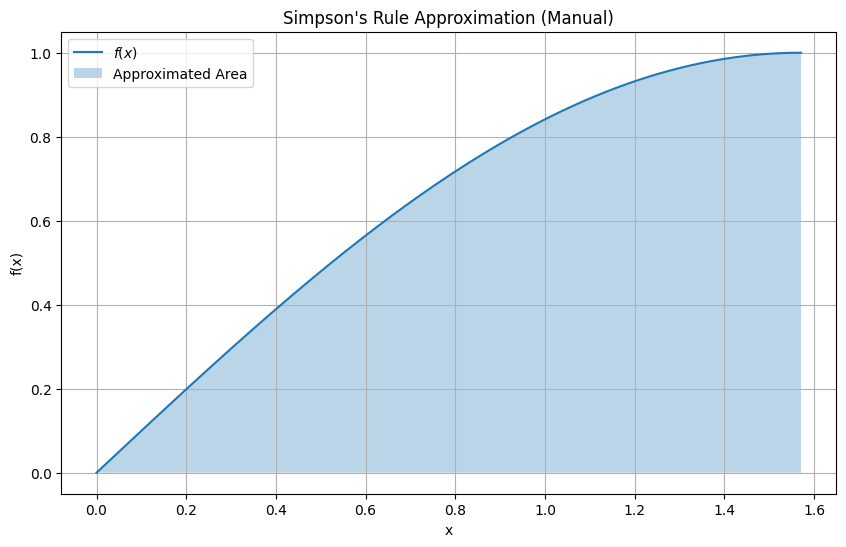

In [6]:
def simpsons_rule_integration(f, a, b, n, h, plot=False):
    # Calculate the x values for the subinterval points
    x_values = np.linspace(a, b, n + 1)
    
    #-------------------------------------------------------------------------------------------------------------
    # random_gaps = np.random.uniform(-0.1, 0.1, size=n+1)
    # random_gaps = np.round(random_gaps * 1000) / 1000
    # random_gaps[0], random_gaps[-1] = 0, 0  # Ensure start and end points don't change
    # x_values += random_gaps
    # x_values = np.round(x_values, 3)  # Ensure x_values themselves are rounded to 3 decimal places
    #-------------------------------------------------------------------------------------------------------------

    # Calculate the function values at the subinterval points
    y_values = np.array([f.subs(x, xi) for xi in x_values])

    # Initialize the sum for Simpson's rule
    approximation = 0

    for i in range(n // 2):
        approximation += (h / 3) * (y_values[2 * i] + 4 * y_values[2 * i + 1] + y_values[2 * i + 2])

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the shaded area under the curve for the approximation
        x_fill = np.linspace(a, b, 400)
        y_fill = f_numeric(x_fill)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label="Approximated Area")

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title("Simpson's Rule Approximation (Manual)")
        plt.legend()
        plt.grid(True)
        plt.show()

    return approximation

# Call the function with and without plotting
approximation = simpsons_rule_integration(f, a, b, n, h, plot=True)


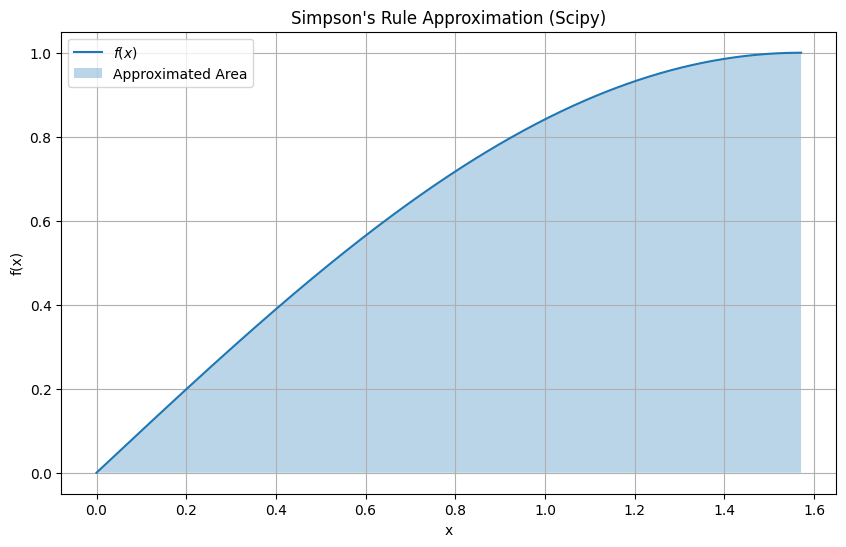

In [7]:
def simpsons_rule_integration_scipy(f, a, b, n, plot=False):
    # Calculate the x values for the subinterval points
    x_values = np.linspace(a, b, n + 1)

    #-------------------------------------------------------------------------------------------------------------
    # random_gaps = np.random.uniform(-0.1, 0.1, size=n+1)
    # random_gaps = np.round(random_gaps * 1000) / 1000
    # random_gaps[0], random_gaps[-1] = 0, 0  # Ensure start and end points don't change
    # x_values += random_gaps
    # x_values = np.round(x_values, 3)  # Ensure x_values themselves are rounded to 3 decimal places
    #-------------------------------------------------------------------------------------------------------------

    # Calculate the function values at the subinterval points
    y_values = np.array([f.subs(x, xi) for xi in x_values])

    # Compute the approximation using scipy's Simpson's rule
    approximation = simps(y_values, x_values)

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the shaded area under the curve for the approximation
        plt.fill_between(x_vals, y_vals, alpha=0.3, label="Approximated Area")

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title("Simpson's Rule Approximation (Scipy)")
        plt.legend()
        plt.grid(True)
        plt.show()

    return approximation

# Call the function with and without plotting
approximation = simpsons_rule_integration_scipy(f, a, b, n, plot=True)

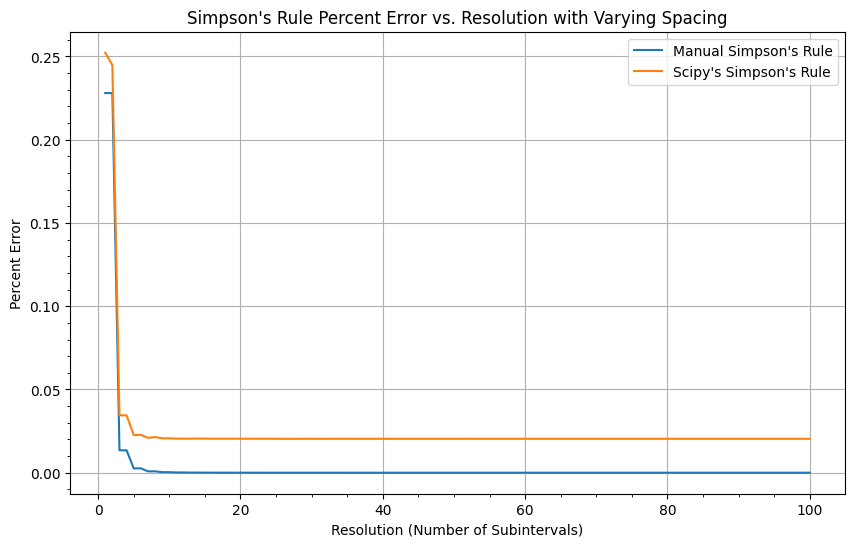

In [8]:
def graph_simpson_error():
    manual_percent_errors = []
    scipy_percent_errors = []
    resolutions = range(1, 101)

    for resolution in resolutions:
        # Ensure even number of subintervals
        if resolution % 2 != 0:
            resolution += 1

        # Calculate 'h' for each resolution
        h = (b - a) / resolution

        # Manual Simpson's Rule
        manual_approximation = simpsons_rule_integration(f, a, b, resolution, h, plot=False)
        manual_percent_error = abs(integral_result - manual_approximation) / integral_result * 100
        manual_percent_errors.append(manual_percent_error)

        # # Scipy's Simpson's Rule
        x_values = np.linspace(a, b, resolution + 1)
        n = resolution  # Number of subintervals
        random_gaps = np.random.uniform(-0.001, 0.001, size=n + 1) # change these numbers to simulate varying independent variable 
        random_gaps = np.round(random_gaps * 1000) / 1000
        random_gaps[0], random_gaps[-1] = 0, 0  # Ensure start and end points don't change
        x_values += random_gaps
        x_values = np.round(x_values, 3)  # Ensure x_values themselves are rounded to 3 decimal places

        y_values = np.array([f.subs(x, xi) for xi in x_values])
        scipy_approximation = simps(y_values, x_values)
        scipy_percent_error = abs(integral_result - scipy_approximation) / integral_result * 100
        scipy_percent_errors.append(scipy_percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, manual_percent_errors, label="Manual Simpson's Rule")
    plt.plot(resolutions, scipy_percent_errors, label="Scipy's Simpson's Rule")
    plt.xlabel('Resolution (Number of Subintervals)')
    plt.ylabel('Percent Error')
    plt.title("Simpson's Rule Percent Error vs. Resolution with Varying Spacing")
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to graph the errors
graph_simpson_error()


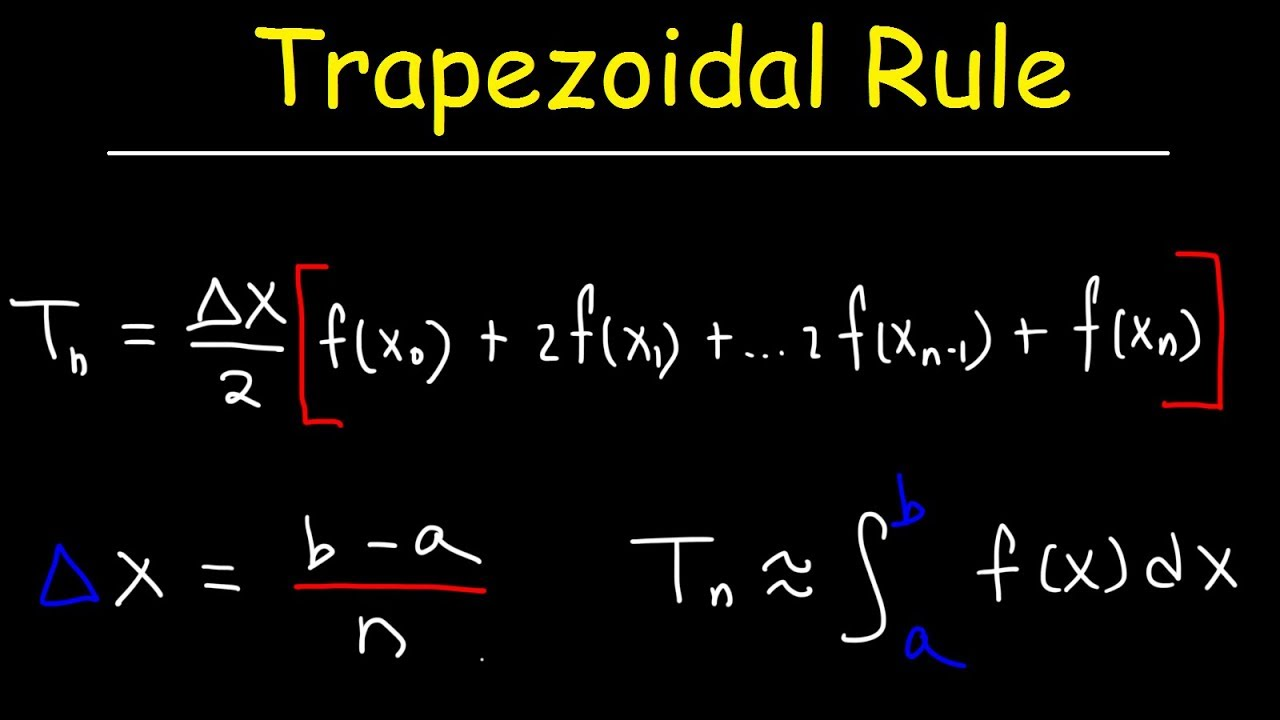

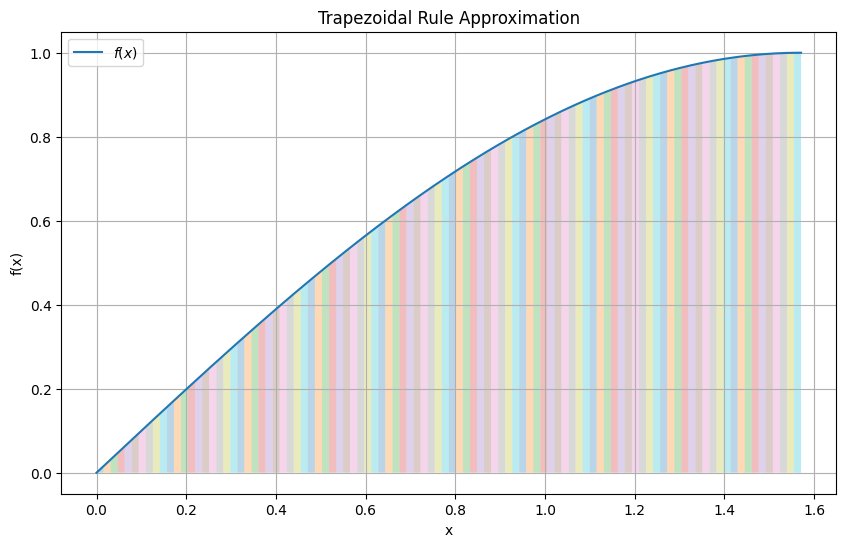

In [9]:

def trapezoid_rule_integration(f, a, b, n, h, plot=False):
    # Calculate x values for the subinterval points
    x_values = [a + i * h for i in range(n + 1)]

    # Calculate the sum of function values using the Trapezoidal Rule
    approximation = (h / 2) * (f.subs(x, a) + 2 * sum([f.subs(x, x_values[i]) for i in range(1, n)]) + f.subs(x, b))

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the trapezoids
        for i in range(n):
            x_i = x_values[i:i+2]
            y_i = [f_numeric(x_i[0]), f_numeric(x_i[1])]
            plt.fill_between(x_i, y_i, alpha=0.3)

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Trapezoidal Rule Approximation')
        plt.legend()
        plt.grid(True)
        plt.show()

    return approximation

# Call the function with and without plotting
approximation = trapezoid_rule_integration(f, a, b, n, h, plot=True)

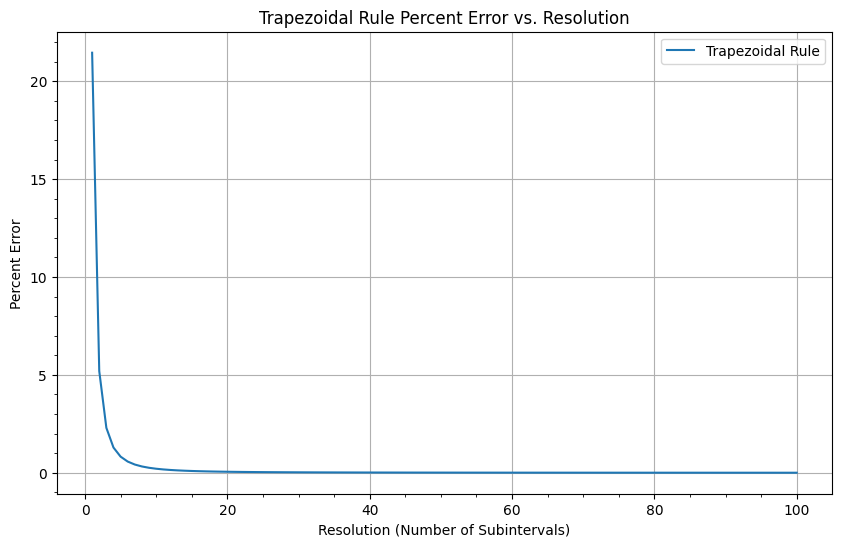

In [10]:
def graph_trapezoid_error():
    percent_errors = []
    resolutions = range(1, 101)
    for resolution in resolutions:
        # Calculate 'h' for each resolution
        h = (b - a) / resolution

        # Call the function with the calculated 'h'
        approximation = trapezoid_rule_integration(f, a, b, resolution, h, plot=False)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors, label='Trapezoidal Rule')
    plt.xlabel('Resolution (Number of Subintervals)')
    plt.ylabel('Percent Error')
    plt.title('Trapezoidal Rule Percent Error vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to graph the errors for the Trapezoidal Rule
graph_trapezoid_error()

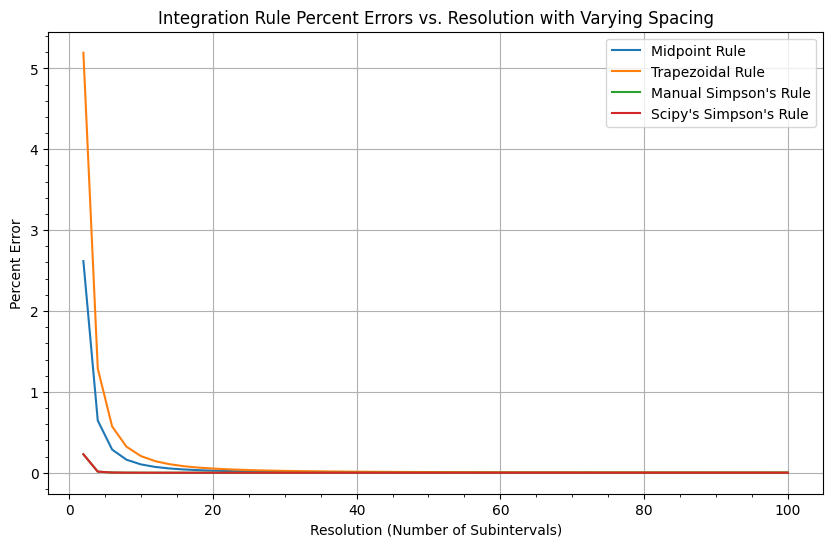

In [11]:
def calculate_errors(f, a, b, n_values):
    midpoint_errors = []
    trapezoid_errors = []
    simpsons_manual_errors = []
    simpsons_scipy_errors = []

    adjusted_n_values = []  # To store the adjusted n values

    for n in n_values:
        # Ensure even number of subintervals for Simpson's rule
        if n % 2 != 0:
            n += 1
        adjusted_n_values.append(n)
        
        h = (b - a) / n

        # Calculate the exact integral result
        integral_result = sp.integrate(f, (x, a, b))

        # Calculate the errors for each integration method
        midpoint_approximation = midpoint_rule_integration(f, a, b, n, h)
        trapezoid_approximation = trapezoid_rule_integration(f, a, b, n, h)
        simpsons_manual_approximation = simpsons_rule_integration(f, a, b, n, h)

        x_values = np.linspace(a, b, n + 1)
        y_values = np.array([f.subs(x, xi) for xi in x_values])

        # Modify Simpson's Scipy rule to include varying spacing
        # random_gaps = np.random.uniform(-0.1, 0.1, size=n + 1)
        # random_gaps = np.round(random_gaps * 1000) / 1000
        # random_gaps[0], random_gaps[-1] = 0, 0  # Ensure start and end points don't change
        # x_values += random_gaps
        # x_values = np.round(x_values, 3)  # Ensure x_values themselves are rounded to 3 decimal places

        simpsons_scipy_approximation = simps(y_values, x_values)

        midpoint_error = abs(integral_result - midpoint_approximation) / integral_result * 100
        trapezoid_error = abs(integral_result - trapezoid_approximation) / integral_result * 100
        simpsons_manual_error = abs(integral_result - simpsons_manual_approximation) / integral_result * 100
        simpsons_scipy_error = abs(integral_result - simpsons_scipy_approximation) / integral_result * 100

        midpoint_errors.append(midpoint_error)
        trapezoid_errors.append(trapezoid_error)
        simpsons_manual_errors.append(simpsons_manual_error)
        simpsons_scipy_errors.append(simpsons_scipy_error)

    return adjusted_n_values, midpoint_errors, trapezoid_errors, simpsons_manual_errors, simpsons_scipy_errors

# Call the function to calculate errors for all three integration methods
n_values = range(1, 101)
adjusted_n_values, midpoint_errors, trapezoid_errors, simpsons_manual_errors, simpsons_scipy_errors = calculate_errors(f, a, b, n_values)

# Plot the errors for all three integration methods
plt.figure(figsize=(10, 6))
plt.plot(adjusted_n_values, midpoint_errors, label='Midpoint Rule')
plt.plot(adjusted_n_values, trapezoid_errors, label='Trapezoidal Rule')
plt.plot(adjusted_n_values, simpsons_manual_errors, label="Manual Simpson's Rule")
plt.plot(adjusted_n_values, simpsons_scipy_errors, label="Scipy's Simpson's Rule")

plt.xlabel('Resolution (Number of Subintervals)')
plt.ylabel('Percent Error')
plt.title('Integration Rule Percent Errors vs. Resolution with Varying Spacing')
plt.minorticks_on()
plt.grid(True)
plt.legend()
plt.show()